In [1]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("Churn_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26996 entries, 0 to 26995
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     26996 non-null  int64  
 1   churn                    26996 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  26996 non-null  object 
 4   deposits                 26996 non-null  int64  
 5   withdrawal               26996 non-null  int64  
 6   purchases_partners       26996 non-null  int64  
 7   purchases                26996 non-null  int64  
 8   cc_taken                 26996 non-null  int64  
 9   cc_recommended           26996 non-null  int64  
 10  cc_disliked              26996 non-null  int64  
 11  cc_liked                 26996 non-null  int64  
 12  cc_application_begin     26996 non-null  int64  
 13  app_downloaded           26996 non-null  int64  
 14  web_user              

In [5]:
data.head(30)

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0
5,3120,1,32.0,R,5,3,111,5,0,227,...,Bi-Weekly,0,0,0,0,Taurus,0,0,1.83,0
6,41406,0,21.0,na,0,0,4,0,0,0,...,Bi-Weekly,0,0,0,0,Cancer,0,0,0.07,0
7,67679,0,24.0,na,0,0,2,0,0,0,...,na,0,0,0,0,Leo,0,0,0.11,0
8,21269,0,28.0,R,0,0,0,0,2,47,...,Bi-Weekly,0,0,0,0,Sagittarius,0,0,0.87,1
9,25788,0,23.0,na,1,0,87,1,0,125,...,Bi-Weekly,0,0,0,0,Aquarius,0,0,1.07,0


In [6]:
data.isnull()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26993,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26994,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:

data.isnull().sum()

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

In [8]:
data.nunique()

user                       24737
churn                          2
age                           73
housing                        3
deposits                      66
withdrawal                    23
purchases_partners           294
purchases                     64
cc_taken                      12
cc_recommended               325
cc_disliked                   20
cc_liked                       9
cc_application_begin         128
app_downloaded                 2
web_user                       2
ios_user                       2
android_user                   2
registered_phones              5
payment_type                   5
waiting_4_loan                 2
cancelled_loan                 2
received_loan                  2
rejected_loan                  2
zodiac_sign                   13
left_for_two_month_plus        2
left_for_one_month             2
reward_rate                  193
is_referred                    2
dtype: int64

In [9]:
data.describe()

,user,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
count,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,...,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.00000,26996.000000,26996.000000,26996.000000
mean,35418.535302,0.413913,32.219921,3.342051,0.307045,28.066677,3.273967,0.073789,92.639502,0.050637,...,0.587235,0.420988,0.001296,0.018818,0.018188,0.004890,0.17347,0.018077,0.907819,0.318010
std,20319.620354,0.492542,9.964838,9.131992,1.055488,42.221432,8.953651,0.437331,88.868773,0.871431,...,0.492340,0.912884,0.035984,0.135883,0.133633,0.069756,0.37866,0.133232,0.751991,0.465712
min,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,17808.750000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.200000,0.000000
50%,35745.500000,0.000000,30.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.780000,0.000000
75%,53236.750000,1.000000,37.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,...,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,4.000000,1.000000


In [10]:
corrmatrix = data.corr()

In [11]:
print(corrmatrix)

                             user     churn       age  deposits  withdrawal  \
user                     1.000000  0.068663 -0.022443 -0.182143   -0.111446   
churn                    0.068663  1.000000 -0.063206 -0.135381   -0.068543   
age                     -0.022443 -0.063206  1.000000  0.088757    0.044177   
deposits                -0.182143 -0.135381  0.088757  1.000000    0.488902   
withdrawal              -0.111446 -0.068543  0.044177  0.488902    1.000000   
purchases_partners      -0.296324 -0.260784 -0.000943  0.326588    0.223692   
purchases               -0.182230 -0.135921  0.088769  0.998554    0.488285   
cc_taken                -0.078437  0.058383  0.077199 -0.047058   -0.040658   
cc_recommended          -0.522829 -0.198570  0.095860  0.376123    0.187423   
cc_disliked             -0.036996  0.009423  0.005577 -0.014680   -0.011105   
cc_liked                -0.027469  0.010886  0.019512 -0.012111   -0.003197   
cc_application_begin    -0.316604 -0.118590  0.16487

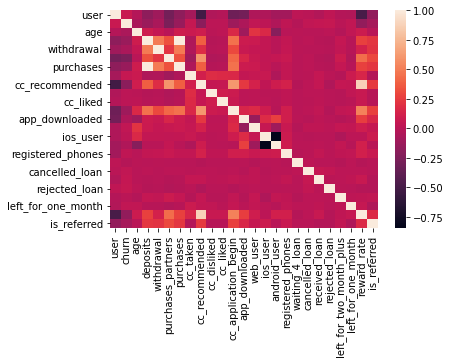

In [14]:
import seaborn as sn
sn.heatmap(corrmatrix)
plt.show()

In [15]:
newdata = data[['churn','cc_taken','cc_disliked','registered_phones','cancelled_loan','received_loan','rejected_loan','left_for_two_month_plus','left_for_one_month']]


In [16]:
newdata.head()

,churn,cc_taken,cc_disliked,registered_phones,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,2,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0


In [ ]:
x=newdata.iloc[:,0:8].values
y=newdata.iloc[:,0].values